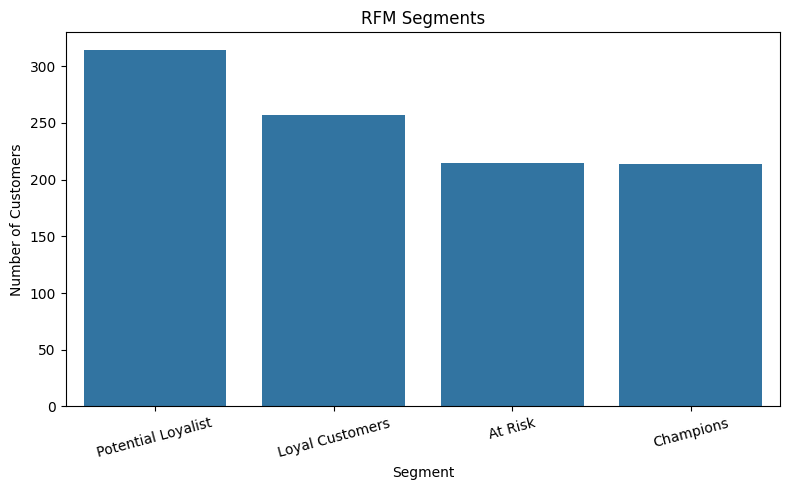

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
0,CUST0001,264,7,698.39,1,2,2,122,5,At Risk
1,CUST0002,345,2,198.71,1,1,1,111,3,At Risk
2,CUST0003,271,1,94.59,1,1,1,111,3,At Risk
3,CUST0004,84,12,1213.53,2,3,4,234,9,Potential Loyalist
4,CUST0005,1,15,1722.59,5,4,5,545,14,Champions


In [1]:
# 📦 Libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 🎲 Simulate Transaction Data
np.random.seed(42)
num_customers = 1000
customer_ids = [f'CUST{i:04d}' for i in range(1, num_customers + 1)]
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)

data = []
for cust in customer_ids:
    num_txns = np.random.randint(1, 20)
    for _ in range(num_txns):
        purchase_date = start_date + timedelta(days=np.random.randint(0, 730))
        amount = round(np.random.exponential(scale=100), 2)
        data.append([cust, purchase_date, amount])

df = pd.DataFrame(data, columns=['CustomerID', 'InvoiceDate', 'Amount'])

# 📊 Create RFM Table
reference_date = df['InvoiceDate'].max() + timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'CustomerID': 'count',
    'Amount': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'CustomerID': 'Frequency',
    'Amount': 'Monetary'
}).reset_index()

# 🧮 Score RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

# 🧠 Assign Segments
def assign_segment(score):
    if score >= 13:
        return 'Champions'
    elif score >= 10:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential Loyalist'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

# 📈 Visualize Segment Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index)
plt.title("RFM Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 📝 Preview final table
rfm.head()


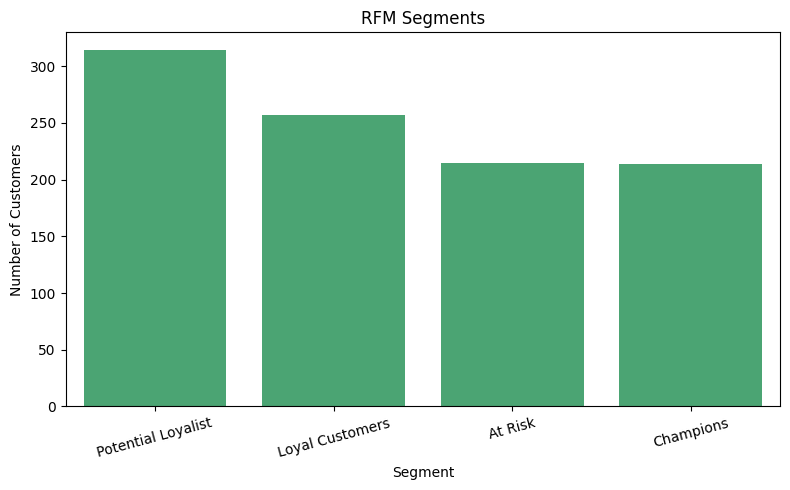

In [2]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index, color='mediumseagreen')
plt.title("RFM Segments")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
